In [1]:
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import yfinance as yf
import mplfinance as mpf
import pytse_client as tse
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

In [2]:
EURUSD = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/ForexData/EURUSD9d.csv",index_col = "Date" , parse_dates = True
                    ,na_values=['nan'])
df = EURUSD
df = pd.DataFrame(df)

In [3]:
#df =df.drop(['Volume'],1)
#df =df.drop(['Open'],1)
#df =df.drop(['Time'],1)
df =df['2010-01-01':]
print(df)

              High1     Low1   Close1    High2     Low2   Close2    High3  \
Date                                                                        
2010-01-04  1.44543  1.42569  1.44111  1.44830  1.43467  1.43624  1.44338   
2010-01-05  1.44830  1.43467  1.43624  1.44338  1.42831  1.43998  1.44456   
2010-01-06  1.44338  1.42831  1.43998  1.44456  1.42994  1.43041  1.44263   
2010-01-07  1.44456  1.42994  1.43041  1.44263  1.42634  1.44085  1.45545   
2010-01-08  1.44263  1.42634  1.44085  1.45545  1.44121  1.45120  1.45448   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-15  1.05076  1.03591  1.04430  1.06009  1.03811  1.05483  1.05602   
2022-06-16  1.06009  1.03811  1.05483  1.05602  1.04447  1.04962  1.05457   
2022-06-17  1.05602  1.04447  1.04962  1.05457  1.04727  1.05104  1.05824   
2022-06-20  1.05457  1.04727  1.05104  1.05824  1.05053  1.05318  1.06054   
2022-06-21  1.05824  1.05053  1.05318  1.06054  1.04691  1.05678  1.05812   

In [4]:
forecast_out = int(2)
df['PredictionClose'] = df['Close9'].shift(-forecast_out)
#print(df.tail())

In [5]:
X = np.array(df.drop(['PredictionClose'],1))
#X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_13988\703062634.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [6]:
Y = np.array(df['PredictionClose'])
Y = Y[:-forecast_out]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [8]:
# Training
Neurons = 100
model = Sequential()
model.add(Dense(Neurons,activation='relu')) # Input Layer 
model.add(Dense(Neurons,activation='relu'))  
model.add(Dense(Neurons,activation='relu'))  
model.add(Dense(Neurons,activation='relu')) 
model.add(Dense(Neurons,activation='relu')) 
model.add(Dense(1)) # Output Layer
model.compile(optimizer='Adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose= 1, patience= 5)
model.fit(x = X_train, y = Y_train,
          validation_data=(X_test, Y_test),
          batch_size= 256,
          epochs= 200,
          callbacks=[early_stop]
          )

Epoch 1/200
9/9 [==============================] - 1s 30ms/step - loss: 0.2994 - val_loss: 0.0379
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0058
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0085
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 7.0998e-04
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 9.0615e-04 - val_loss: 8.6197e-04
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 6.8074e-04 - val_loss: 4.5992e-04
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 3.3995e-04 - val_loss: 3.1254e-04
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 3.1154e-04 - val_loss: 2.7121e-04
Epoch 9/200
9/9 [==============================] - 0s 8ms/step - loss: 2.6810e-04 - val_loss: 2.8169e-04
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: 2.6971e-04

<AxesSubplot:>

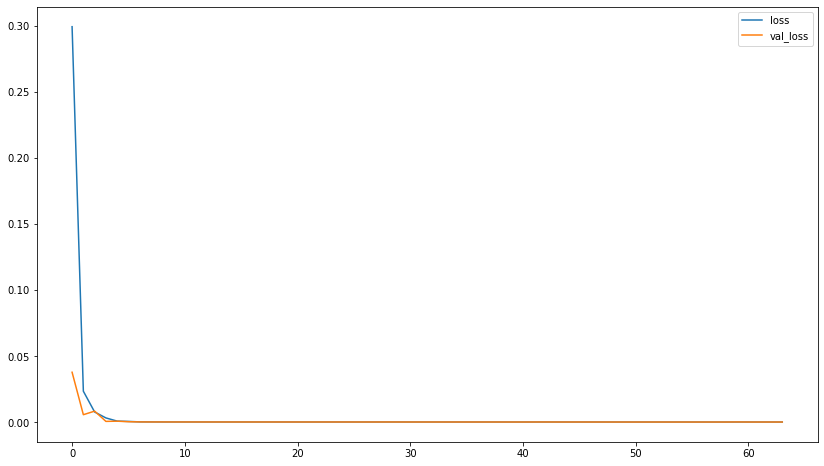

In [9]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize=(14,8))


In [10]:
testpredictions = model.predict(X_test)

31/31 [==============================] - 0s 1ms/step


In [11]:
#Testing
#confidence = model.score(X_test,Y_test)
#print("confidence:", confidence)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

R2 Score is:  0.9821244689572675
Mean Squared Error is:  0.00022399762973397973
Root Mean Squared Error is:  0.014966550361856259
Mean Absolute Error is:  0.011431584982670665
Mean Absolute Percentage Error is:  0.009314581072366426


In [12]:
#print(X_forecast)

In [13]:
forecast_prediction = model.predict(X_forecast)
print(forecast_prediction)

1/1 [==============================] - 0s 17ms/step
[[1.0522044]
 [1.0509306]]


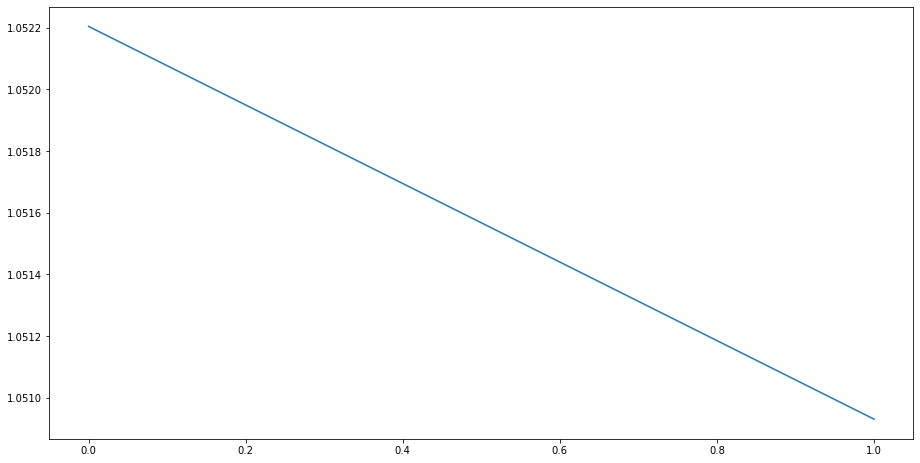

In [14]:
plt.axes([1, 2, 2 , 1.5])
plt.plot(forecast_prediction)

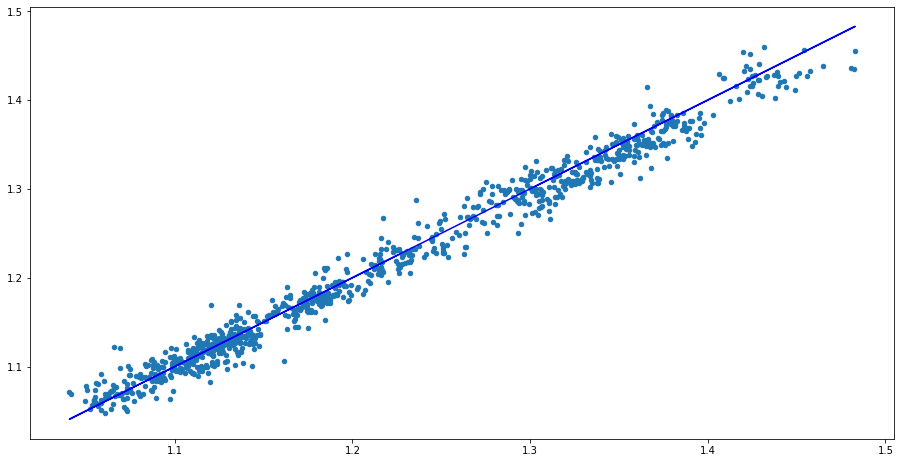

In [15]:
plt.axes([1, 2, 2 , 1.5])
plt.scatter(Y_test, testpredictions,s=20)
plt.plot(Y_test, Y_test, 'b')

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes:ylabel='Density'>

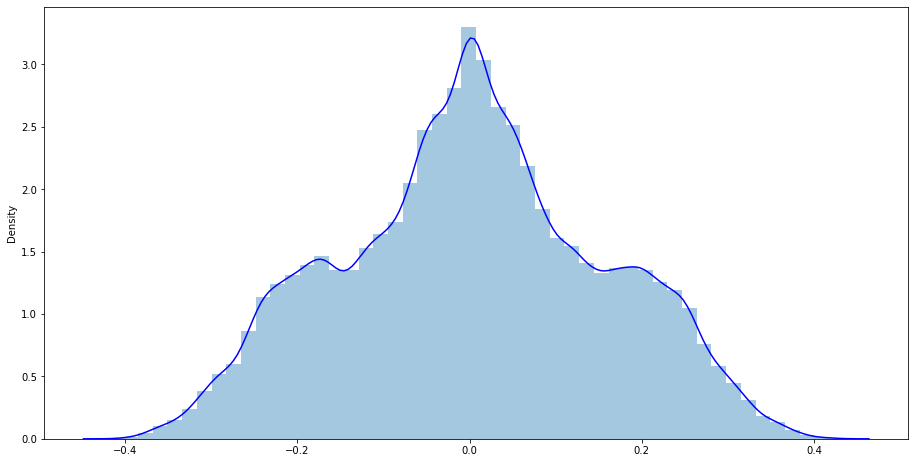

In [16]:
plt.axes([1, 2, 2 , 1.5])
sns.distplot(Y_test-testpredictions, kde=True, kde_kws={'color':'b'}, bins=50)